In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from os import path

# Load the CSV file, skipping the metadata rows (assuming metadata ends at row 8)
FOLDER_DATA = "comsol_data"
FILE_NAME_DATA = "2D_001.csv"
FILE_PATH_DATA = path.join(FOLDER_DATA, FILE_NAME_DATA)
df = pd.read_csv(FILE_PATH_DATA, skiprows=0)

# Rename columns for easier access
df.columns = ['X (m)', 'Y (m)', 'c_KOH (mol/m^3)', 'W_mem (m)', 'T (K)', 'E_cell (V)', 'I_density (A/m^2)']


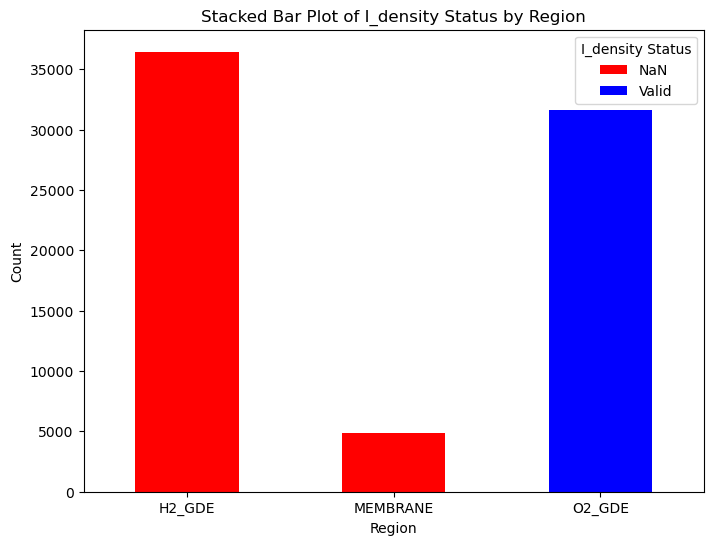

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to determine the region for each row
def determine_region(row):
    # Assuming that "X (m)" is the position along the width
    # and "W_mem (m)" is the membrane thickness for that row.
    if row['X (m)'] < 0.00037:
        return 'H2_GDE'
    elif row['X (m)'] < 0.00037 + row['W_mem (m)']:
        return 'MEMBRANE'
    else:
        return 'O2_GDE'

# Apply the function to create a new column for region classification
df['region'] = df.apply(determine_region, axis=1)

# Create a new column for I_density status:
# "Valid" if not NaN, otherwise "NaN"
df['I_density_status'] = df['I_density (A/m^2)'].isna().map({True: 'NaN', False: 'Valid'})

# Group by region and I_density_status and count the entries
counts = df.groupby(['region', 'I_density_status']).size().unstack(fill_value=0)

# Ensure the regions appear in the order: H2_GDE, MEMBRANE, O2_GDE
desired_order = ["H2_GDE", "MEMBRANE", "O2_GDE"]
counts = counts.reindex(desired_order)

# Plot a stacked bar chart
ax = counts.plot(kind='bar', stacked=True, figsize=(8, 6),
                 color={'Valid': 'blue', 'NaN': 'red'})

plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Stacked Bar Plot of I_density Status by Region")
plt.legend(title="I_density Status")
plt.xticks(rotation=0)
plt.show()


In [9]:
# modify I_density A/m^2 -> A/cm^2
df['I_density (A/m^2)'] = df['I_density (A/m^2)'] / 10000  # Convert to A/cm^2

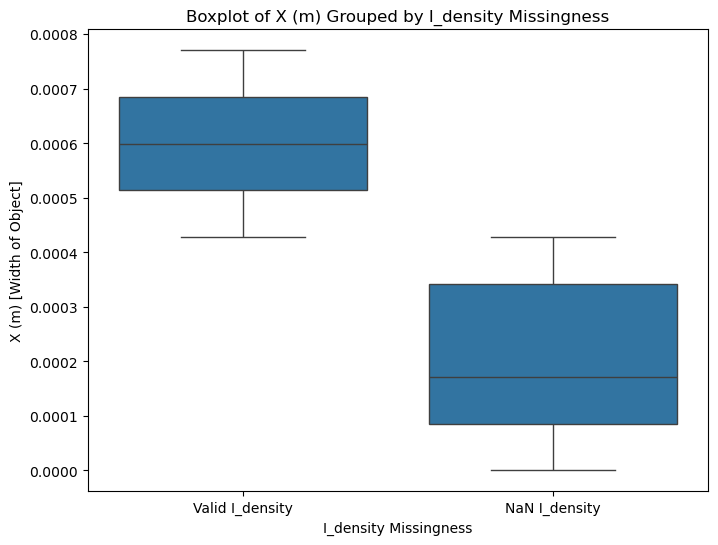

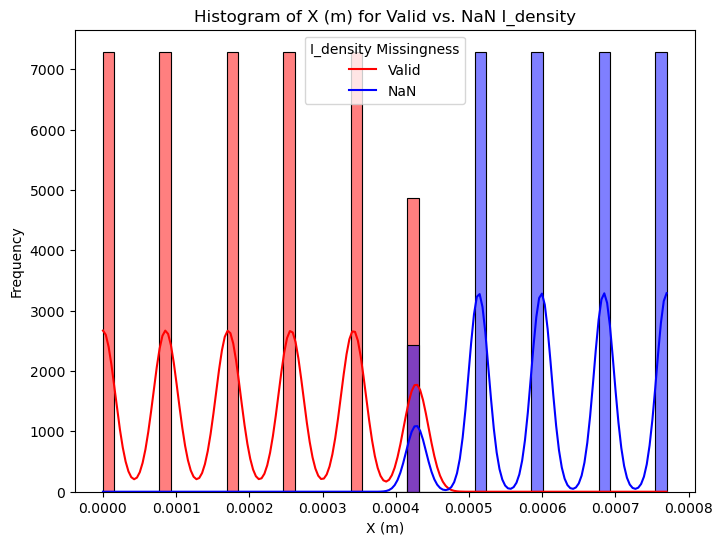

Quantiles for X (m) when I_density is VALID:
0.05    0.000428
0.25    0.000513
0.50    0.000599
0.75    0.000684
0.95    0.000770
Name: X (m), dtype: float64

Quantiles for X (m) when I_density is NaN:
0.05    0.000000
0.25    0.000086
0.50    0.000171
0.75    0.000342
0.95    0.000428
Name: X (m), dtype: float64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure the flag for missing I_density is available
# (If not already created, this will add it)
if 'I_density_missing' not in df.columns:
    df['I_density_missing'] = df['I_density (A/m^2)'].isna()

# 1. Boxplot: Compare the distribution of X (m) between valid and NaN I_density rows.
plt.figure(figsize=(8, 6))
sns.boxplot(x='I_density_missing', y='X (m)', data=df)
plt.xticks([0, 1], ['Valid I_density', 'NaN I_density'])
plt.title("Boxplot of X (m) Grouped by I_density Missingness")
plt.ylabel("X (m) [Width of Object]")
plt.xlabel("I_density Missingness")
plt.show()

# 2. Histogram with KDE: Distribution of X for valid vs. missing I_density values.
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='X (m)', hue='I_density_missing', bins=50, kde=True, palette=['blue', 'red'])
plt.title("Histogram of X (m) for Valid vs. NaN I_density")
plt.xlabel("X (m)")
plt.ylabel("Frequency")
plt.legend(title="I_density Missingness", labels=["Valid", "NaN"])
plt.show()

# 3. Print Quantiles: Summarize the distribution of X for both groups.
valid_quantiles = df.loc[~df['I_density_missing'], 'X (m)'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
nan_quantiles = df.loc[df['I_density_missing'], 'X (m)'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

print("Quantiles for X (m) when I_density is VALID:")
print(valid_quantiles)
print("\nQuantiles for X (m) when I_density is NaN:")
print(nan_quantiles)


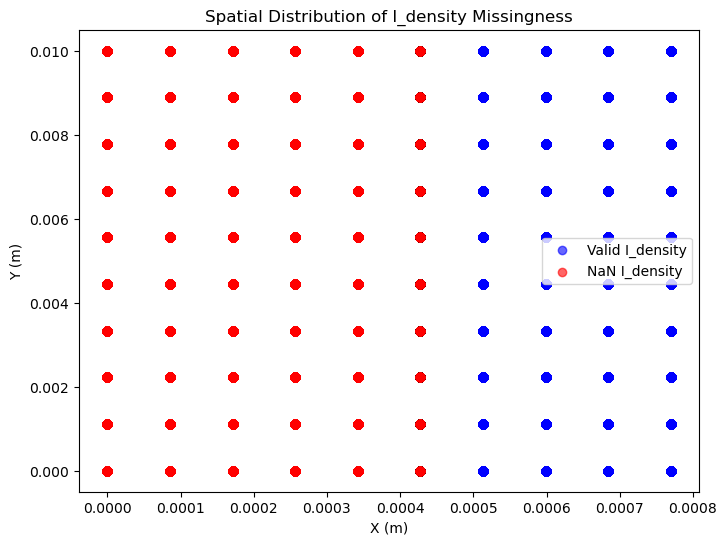

C:\Users\ebben\AppData\Local\Temp\ipykernel_23564\3438923638.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[~df['I_density_missing'], col], label='Valid I_density', shade=True)
C:\Users\ebben\AppData\Local\Temp\ipykernel_23564\3438923638.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['I_density_missing'], col], label='NaN I_density', shade=True)


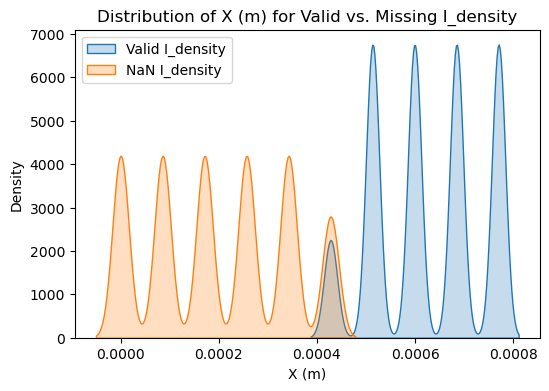

C:\Users\ebben\AppData\Local\Temp\ipykernel_23564\3438923638.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[~df['I_density_missing'], col], label='Valid I_density', shade=True)
C:\Users\ebben\AppData\Local\Temp\ipykernel_23564\3438923638.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['I_density_missing'], col], label='NaN I_density', shade=True)


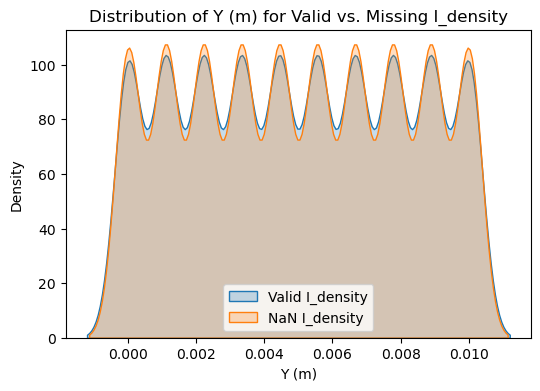

C:\Users\ebben\AppData\Local\Temp\ipykernel_23564\3438923638.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[~df['I_density_missing'], col], label='Valid I_density', shade=True)
C:\Users\ebben\AppData\Local\Temp\ipykernel_23564\3438923638.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['I_density_missing'], col], label='NaN I_density', shade=True)


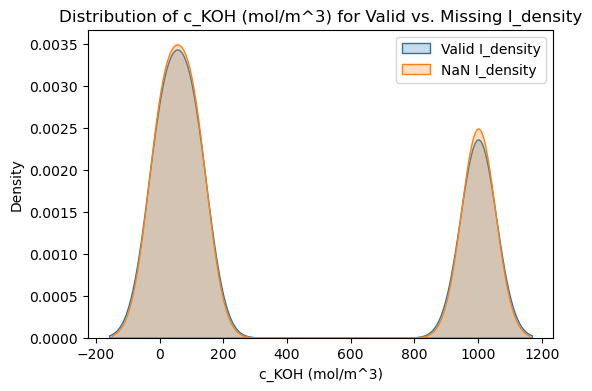

C:\Users\ebben\AppData\Local\Temp\ipykernel_23564\3438923638.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[~df['I_density_missing'], col], label='Valid I_density', shade=True)
C:\Users\ebben\AppData\Local\Temp\ipykernel_23564\3438923638.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['I_density_missing'], col], label='NaN I_density', shade=True)


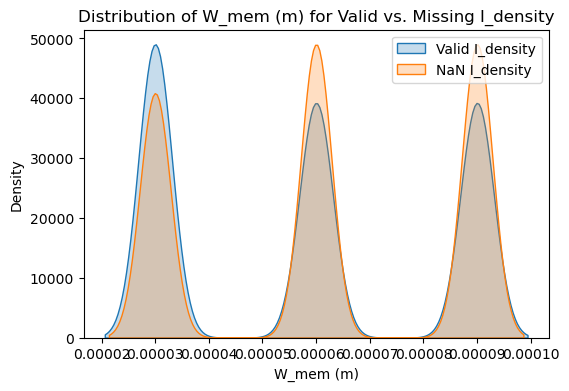

C:\Users\ebben\AppData\Local\Temp\ipykernel_23564\3438923638.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[~df['I_density_missing'], col], label='Valid I_density', shade=True)
C:\Users\ebben\AppData\Local\Temp\ipykernel_23564\3438923638.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['I_density_missing'], col], label='NaN I_density', shade=True)


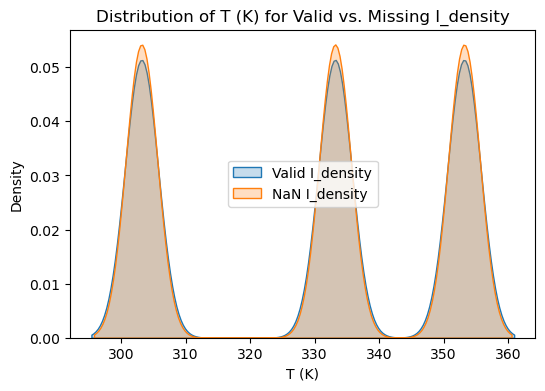

C:\Users\ebben\AppData\Local\Temp\ipykernel_23564\3438923638.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[~df['I_density_missing'], col], label='Valid I_density', shade=True)
C:\Users\ebben\AppData\Local\Temp\ipykernel_23564\3438923638.py:29: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df.loc[df['I_density_missing'], col], label='NaN I_density', shade=True)


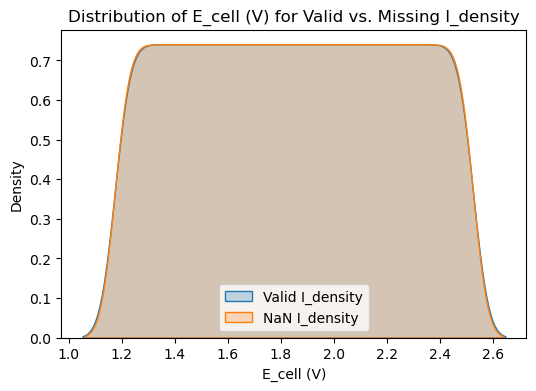

Summary statistics for predictors grouped by I_density missingness:
                     X (m)                                                    \
                     count      mean       std       min       25%       50%   
I_density_missing                                                              
False              31590.0  0.000625  0.000108  0.000428  0.000513  0.000599   
True               41310.0  0.000201  0.000141  0.000000  0.000086  0.000171   

                                         Y (m)         ...   T (K)          \
                        75%       max    count   mean  ...     75%     max   
I_density_missing                                      ...                   
False              0.000684  0.000770  31590.0  0.005  ...  353.15  353.15   
True               0.000342  0.000428  41310.0  0.005  ...  353.15  353.15   

                  E_cell (V)                                            
                       count  mean       std  min  25%   50%  75%  

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Flag rows with missing I_density values
df['I_density_missing'] = df['I_density (A/m^2)'].isna()

# 1. Spatial distribution: Plot X vs Y, color-coded by missingness of I_density
plt.figure(figsize=(8,6))
plt.scatter(df.loc[~df['I_density_missing'], 'X (m)'], 
            df.loc[~df['I_density_missing'], 'Y (m)'], 
            c='blue', label='Valid I_density', alpha=0.6)
plt.scatter(df.loc[df['I_density_missing'], 'X (m)'], 
            df.loc[df['I_density_missing'], 'Y (m)'], 
            c='red', label='NaN I_density', alpha=0.6)
plt.xlabel("X (m)")
plt.ylabel("Y (m)")
plt.title("Spatial Distribution of I_density Missingness")
plt.legend()
plt.show()

# 2. Compare distributions for each predictor between rows with and without I_density values
predictors = ['X (m)', 'Y (m)', 'c_KOH (mol/m^3)', 'W_mem (m)', 'T (K)', 'E_cell (V)']

for col in predictors:
    plt.figure(figsize=(6,4))
    # KDE plot for valid I_density rows
    sns.kdeplot(df.loc[~df['I_density_missing'], col], label='Valid I_density', shade=True)
    # KDE plot for missing I_density rows
    sns.kdeplot(df.loc[df['I_density_missing'], col], label='NaN I_density', shade=True)
    plt.title(f"Distribution of {col} for Valid vs. Missing I_density")
    plt.xlabel(col)
    plt.legend()
    plt.show()

# 3. Print summary statistics for each group
group_stats = df.groupby('I_density_missing')[predictors].describe()
print("Summary statistics for predictors grouped by I_density missingness:")
print(group_stats)


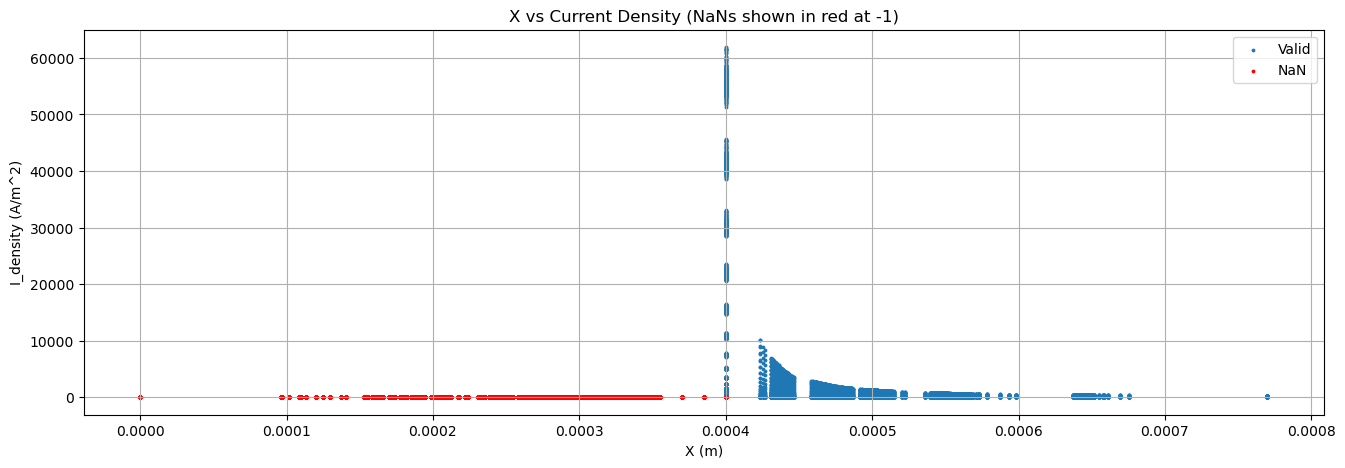

In [6]:
plt.figure(figsize=(16, 5))

# Plot non-NaN values
mask_valid = df['I_density (A/m^2)'].notna()
plt.scatter(df.loc[mask_valid, 'X (m)'], df.loc[mask_valid, 'I_density (A/m^2)'], s=3, label='Valid')

# Plot NaN values as red dots at -1
mask_nan = df['I_density (A/m^2)'].isna()
plt.scatter(df.loc[mask_nan, 'X (m)'], [-1] * mask_nan.sum(), color='red', s=3, label='NaN')

plt.xlabel('X (m)')
plt.ylabel('I_density (A/m^2)')
plt.title('X vs Current Density (NaNs shown in red at -1)')
plt.grid(True)
plt.legend()
plt.show()

X values where I_density is NaN:
[0.00037    0.00034645 0.00034397 ... 0.00028979 0.0003001  0.00030722]

X values where I_density is NOT NaN:
[0.00059363 0.00064489 0.00055308 ... 0.00068383 0.00069906 0.00067369]


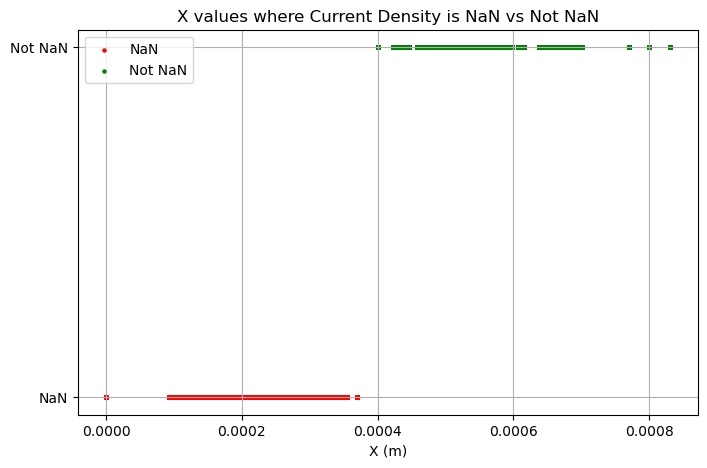

In [7]:
# Check where I_density is NaN
nan_mask = df['I_density (A/m^2)'].isna()
non_nan_mask = ~nan_mask

# Extract corresponding X values
x_nan = df.loc[nan_mask, 'X (m)']
x_non_nan = df.loc[non_nan_mask, 'X (m)']

# Print or display them
print("X values where I_density is NaN:")
print(x_nan.unique())

print("\nX values where I_density is NOT NaN:")
print(x_non_nan.unique())

# Optional: plot them for visualization
plt.figure(figsize=(8, 5))
plt.scatter(x_nan, [0]*len(x_nan), color='red', label='NaN', s=5)
plt.scatter(x_non_nan, [1]*len(x_non_nan), color='green', label='Not NaN', s=5)
plt.xlabel('X (m)')
plt.yticks([0, 1], ['NaN', 'Not NaN'])
plt.title('X values where Current Density is NaN vs Not NaN')
plt.legend()
plt.grid(True)
plt.show()

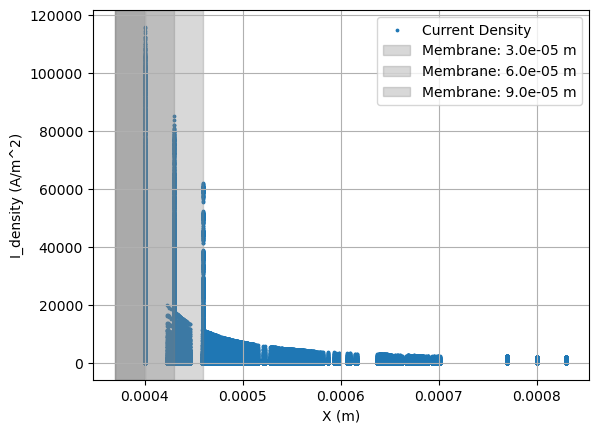

In [9]:
# Plotting X vs I_density, marking membrane region
import matplotlib.pyplot as plt

# Plot current density
plt.scatter(df['X (m)'], df['I_density (A/m^2)'], s=3, label='Current Density')

# Plot membrane region as shaded area
# Membrane starts after anode (0.00037 m) and ends at 0.00037 + W_mem

w_mem = df['W_mem (m)'].unique()
for w in w_mem:
    plt.axvspan(0.00037, 0.00037 + w, color='gray', alpha=0.3, label=f'Membrane: {w:.1e} m')

plt.xlabel('X (m)')
plt.ylabel('I_density (A/m^2)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# print 

In [11]:
X_unique = df['X (m)'].unique()
print("Unique values in column 'X (m)':")
print(X_unique)

Unique values in column 'X (m)':
[0.00037    0.00034645 0.00034397 ... 0.00068383 0.00069906 0.00067369]


Correlation coefficients with I_density (A/m^2):
X (m)               -0.268458
Y (m)                0.001433
c_KOH (mol/m^3)      0.257607
W_mem (m)           -0.084920
T (K)                0.106281
E_cell (V)           0.424483
I_density (A/m^2)    1.000000
Name: I_density (A/m^2), dtype: float64


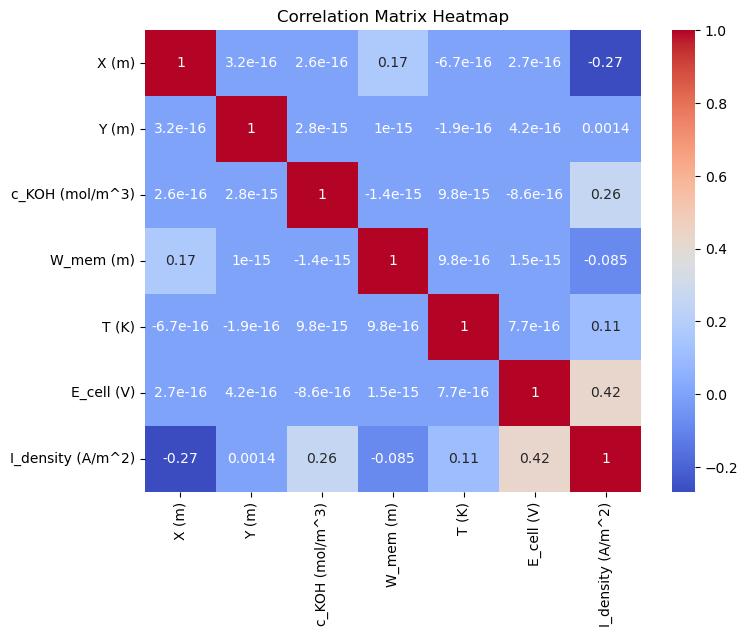

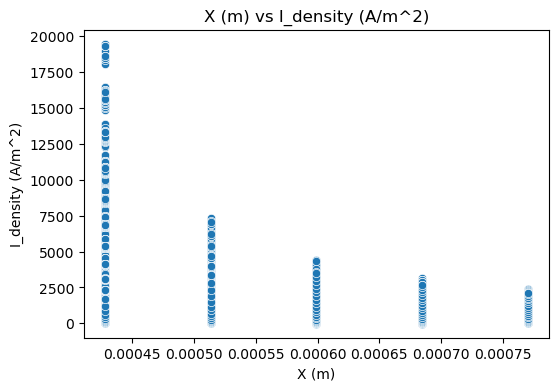

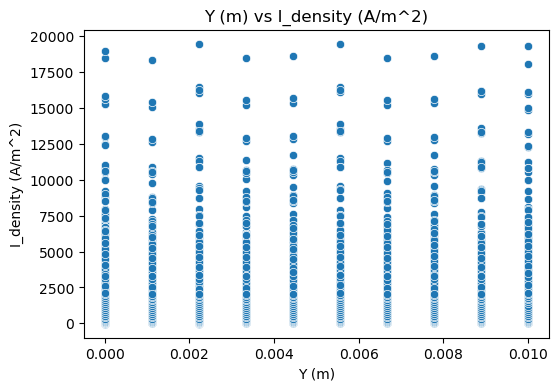

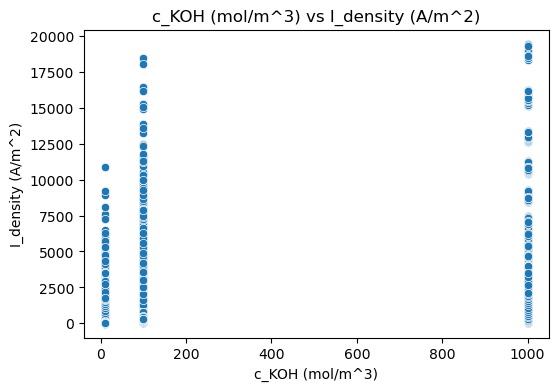

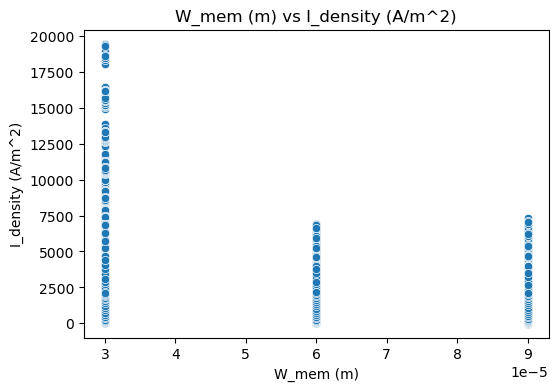

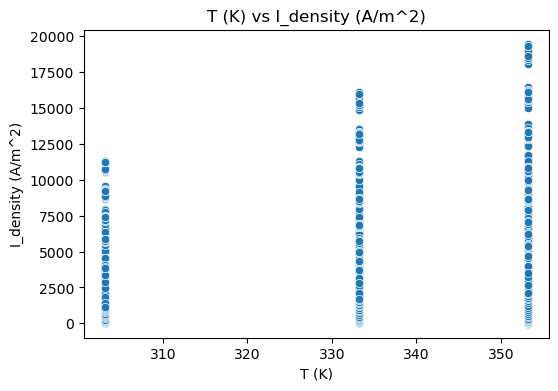

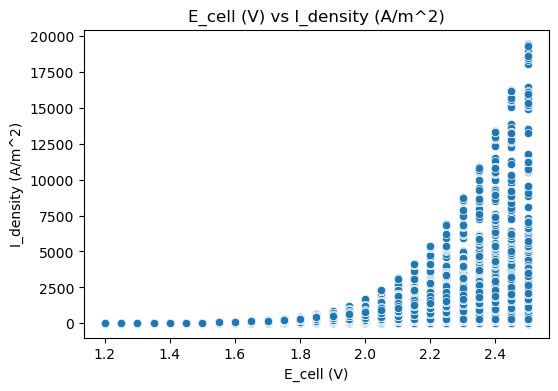

In [4]:
# Analysis of correlations between I_density and other parameters

import seaborn as sns
import matplotlib.pyplot as plt

# Create a new DataFrame that only includes rows where I_density is not NaN
df_valid = df.dropna(subset=['I_density (A/m^2)'])

# Compute the correlation matrix for all columns
corr_matrix = df_valid.corr()

# Print the correlation coefficients for I_density
print("Correlation coefficients with I_density (A/m^2):")
print(corr_matrix['I_density (A/m^2)'])

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

# List of predictor columns (excluding the target 'I_density (A/m^2)')
predictors = ['X (m)', 'Y (m)', 'c_KOH (mol/m^3)', 'W_mem (m)', 'T (K)', 'E_cell (V)']

# Create scatter plots for each predictor versus I_density
for col in predictors:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_valid[col], y=df_valid['I_density (A/m^2)'])
    plt.title(f"{col} vs I_density (A/m^2)")
    plt.xlabel(col)
    plt.ylabel("I_density (A/m^2)")
    plt.show()
